# README


* PanStarrs survey: https://panstarrs.stsci.edu/


* Gaia DR2 release: https://www.cosmos.esa.int/web/gaia/dr2


* Marchetti Subset: https://arxiv.org/abs/1804.10607


* Purpose of this code:
    * Match the Marchetti subset of Gaia data with both PanStarrs and GAIA-DR2
      and create Color-Magnitude Diagrams using the respective colors.


* Packages needed:
    * astropy: http://www.astropy.org/
    * numpy: http://www.numpy.org/
    * matplotlib: https://matplotlib.org/
    

* Cross-Match for both PanStarrs and GAIA-DR2 was done using http://cdsxmatch.u-strasbg.fr/xmatch
  The Marchetti data was divided into 2 Tables for size purposes. The tables were constructed 
  with 3 columns: The first one being the index of the Marchetti subset; the second the RA; the third DEC.
  

* Assumed constants and coordinates:
    * X direction pointed towards GC
    * Y-direction along Galactic rotation
    * Z-direction pointing towards Galactic North-Pole
    * $X_{sun} = -8 kpc$
    * $Y_{sun} = 0$
    * $Z_{sun} = 25 pc$

# Importing and Creating Tables for PanStarrs crossmatch

In [1]:
# Importing Table to create tables; numpy for changing them; plt for making plots
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

# Creating the tables. They will be joined later
PanStarrs = Table.read('C:/Users/dougl/Downloads/TAABLE1.csv', format = 'csv')
PanStarrs2 = Table.read('C:/Users/dougl/Downloads/TAABLE2.csv', format = 'csv')

#Printing the headers to know what's inside
print(PanStarrs[1].columns)

<TableColumns names=('angDist','col1','col2','col3','objID','RAJ2000','DEJ2000','errHalfMaj','errHalfMin','errPosAng','f_objID','Qual','Epoch','Ns','Nd','gmag','e_gmag','gKmag','e_gKmag','gFlags','rmag','e_rmag','rKmag','e_rKmag','rFlags','imag','e_imag','iKmag','e_iKmag','iFlags','zmag','e_zmag','zKmag','e_zKmag','zFlags','ymag','e_ymag','yKmag','e_yKmag','yFlags')>


# Joining both tables and matching them to Marchetti

In [2]:
#Setting arrays for both tables of desired variables.
Gmag1 = np.array(PanStarrs["gmag"])
Rmag1 = np.array(PanStarrs["rmag"])
Imag1 = np.array(PanStarrs["imag"])
Zmag1 = np.array(PanStarrs["zmag"])
Ymag1 = np.array(PanStarrs["ymag"])
idx1 = np.array(PanStarrs["col1"])

Gmag2 = np.array(PanStarrs2["gmag"])
Rmag2 = np.array(PanStarrs2["rmag"])
Imag2 = np.array(PanStarrs2["imag"])
Zmag2 = np.array(PanStarrs2["zmag"])
Ymag2 = np.array(PanStarrs2["ymag"])
idx2 = np.array(PanStarrs2["col1"])

#Joining them together. Making the index integers.
Gmag = np.concatenate((Gmag1, Gmag2), axis=0)
Rmag = np.concatenate((Rmag1, Rmag2), axis=0)
Imag = np.concatenate((Imag1, Imag2), axis=0)
Zmag = np.concatenate((Zmag1, Zmag2), axis=0)
Ymag = np.concatenate((Ymag1, Ymag2), axis=0)
idx = np.concatenate((idx1, idx2), axis=0)
idx = idx.astype(np.int64)

In [12]:
#Opening Marchetti subset
data_table = Table.read('C:/Users/dougl/Desktop/Marchetti data/data.fits', format = 'fits')

#Setting desired variables to zero arrays.
X = np.zeros(len(idx))
Y = np.zeros(len(idx))
Z = np.zeros(len(idx))
R = np.zeros(len(idx))
U = np.zeros(len(idx))
V = np.zeros(len(idx))
W = np.zeros(len(idx))
dist = np.zeros(len(idx))

#loop for getting all the data that was cross-matched
j = 0
for i in idx:
    X[j] = data_table["xGC"][i] + 8000
    Y[j] = data_table["yGC"][i]
    Z[j] = data_table["zGC"][i] - 25
    R[j] = data_table["RGC"][i]
    U[j] = data_table["U"][i]
    V[j] = data_table["V"][i]
    W[j] = data_table["W"][i]
    dist[j] = data_table["dist"][i]
    j = j+1

#Setting range for future loops
rng1 = len(X) - 1

# Plotting CMD over all data

Text(0,0.5,'$AbsGmag$')

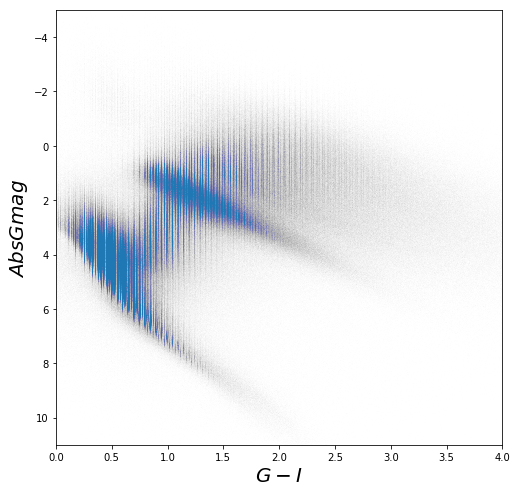

In [13]:
#########################################################
#G-I vs AbsG. Possible to see reddening effects.

#Calculating Absolute Gmag
Abs_Gmag = Gmag - 5*np.log10(dist) + 5

#plotting the image
plt.figure(figsize=(8,8))
plt.scatter(Gmag-Imag, Abs_Gmag, s=0.004, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0,4)
plt.ylim(11,-5)
plt.xlabel("$G-I$", fontsize=20)
plt.ylabel("$AbsGmag$", fontsize=20)

Text(0,0.5,'$AbsRmag$')

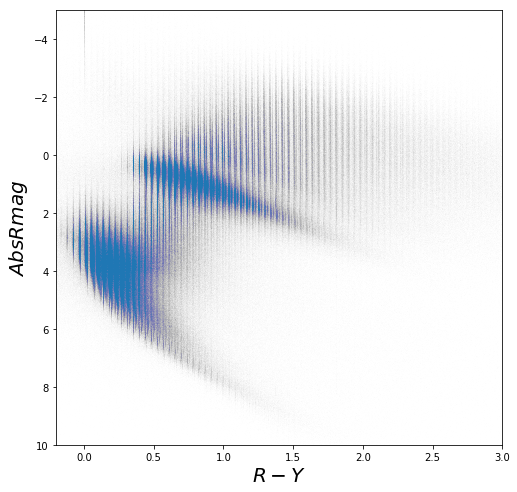

In [14]:
###########################################################
# R-Y vs AbsRmag. Also reddening effects.

#Calculating AbsRmag
Abs_Rmag = Rmag - 5*np.log10(dist) + 5

#Plotting image
plt.figure(figsize=(8,8))
plt.scatter(Rmag-Ymag, Abs_Rmag, s=0.004, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-0.2,3)
plt.ylim(10,-5)
plt.xlabel("$R-Y$", fontsize=20)
plt.ylabel("$AbsRmag$", fontsize=20)

# Selecting data in a cylinder of radius 100pc around Sun

In [15]:
#Creating cylindrical coordinate R
R = X**2 + Y**2

#Selecting stars around 100 pc of Sun
ichoose = np.where((R < 10000))

#Creating empty arrays and filling them with zeros.
X_Close = np.zeros(len(ichoose[0])-1)
Y_Close = np.zeros(len(ichoose[0])-1)      
Gmag_Close = np.zeros(len(ichoose[0])-1)      
Rmag_Close = np.zeros(len(ichoose[0])-1)
Imag_Close = np.zeros(len(ichoose[0])-1)
Zmag_Close = np.zeros(len(ichoose[0])-1)
Ymag_Close = np.zeros(len(ichoose[0])-1)
dist_Close = np.zeros(len(ichoose[0])-1)

#Adding the selected stars to the arrays and 
#converting to Galactocentric coord and kpc.
for i in range(0,len(ichoose[0])-1):
    X_Close[i] = X[ichoose[0][i]]*0.001 - 8
    Y_Close[i] = Y[ichoose[0][i]]*0.001
    Gmag_Close[i] = Gmag[ichoose[0][i]]
    Rmag_Close[i] = Rmag[ichoose[0][i]]
    Imag_Close[i] = Imag[ichoose[0][i]]
    Zmag_Close[i] = Zmag[ichoose[0][i]]
    Ymag_Close[i] = Ymag[ichoose[0][i]]
    dist_Close[i] = dist[ichoose[0][i]]

# PanStarrs CMD of close stars

Text(0,0.5,'$AbsRmag$')

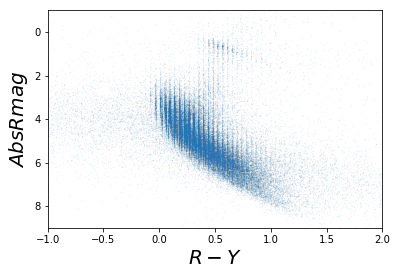

In [16]:
###########################################################
# R-Y vs AbsRmag. Way less reddening cause its so close.

#Calculating absolute Rmag
Abs_Rmag2 = Rmag_Close - 5*np.log10(dist_Close) + 5

#Plotting
plt.scatter(Rmag_Close-Ymag_Close, Abs_Rmag2, s=0.02, alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlim(-1,2)
plt.ylim(9,-1)
plt.xlabel("$R-Y$", fontsize=20)
plt.ylabel("$AbsRmag$", fontsize=20)

# Creating Tables for GAIA DR2 Crossmatch

In [17]:
#creating tables
Gaia_table1 = Table.read('C:/Users/dougl/Downloads/gaia1.csv', format = 'csv')
Gaia_table2 = Table.read('C:/Users/dougl/Downloads/gaia2.csv', format = 'csv')

#printing headers to know what is in the tables
print(Gaia_table1[1].columns)

<TableColumns names=('angDist','col1','col2','col3','ra_epoch2000','dec_epoch2000','errHalfMaj','errHalfMin','errPosAng','source_id','ra','ra_error','dec','dec_error','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','duplicated_source','phot_g_mean_flux','phot_g_mean_flux_error','phot_g_mean_mag','phot_bp_mean_flux','phot_bp_mean_flux_error','phot_bp_mean_mag','phot_rp_mean_flux','phot_rp_mean_flux_error','phot_rp_mean_mag','bp_rp','radial_velocity','radial_velocity_error','teff_val','a_g_val','e_bp_min_rp_val','radius_val','lum_val')>


# Joining Both GAIA tables and matching them to Marchetti

In [18]:
# Setting arrays for both tables of variables I want.
Gaia_Gmag1 = np.array(Gaia_table1["phot_g_mean_mag"])
Gaia_BPmag1 = np.array(Gaia_table1["phot_bp_mean_mag"])
Gaia_RPmag1 = np.array(Gaia_table1["phot_rp_mean_mag"])
Extinction1 = np.array(Gaia_table1["a_g_val"])
Color_exc1 = np.array(Gaia_table1["e_bp_min_rp_val"])
g_idx1 = np.array(Gaia_table1["col1"])

Gaia_Gmag2 = np.array(Gaia_table2["phot_g_mean_mag"])
Gaia_BPmag2 = np.array(Gaia_table2["phot_bp_mean_mag"])
Gaia_RPmag2 = np.array(Gaia_table2["phot_rp_mean_mag"])
Extinction2 = np.array(Gaia_table2["a_g_val"])
Color_exc2 = np.array(Gaia_table2["e_bp_min_rp_val"])
g_idx2 = np.array(Gaia_table2["col1"])

# Joining them together. Making the index integers so they work in loop.
Gaia_Gmag = np.concatenate((Gaia_Gmag1, Gaia_Gmag2), axis=0)
Gaia_BPmag = np.concatenate((Gaia_BPmag1, Gaia_BPmag2), axis=0)
Gaia_RPmag = np.concatenate((Gaia_RPmag1, Gaia_RPmag2), axis=0)
Extinction = np.concatenate((Extinction1, Extinction2), axis=0)
Color_exc = np.concatenate((Color_exc1, Color_exc2), axis=0)
g_idx = np.concatenate((g_idx1, g_idx2), axis=0)
g_idx = g_idx.astype(np.int64)

In [21]:
# Matching it to Marchetti Data

#Creating empty arrays of what I want
Gaia_X = np.zeros(len(g_idx))
Gaia_Y = np.zeros(len(g_idx))
Gaia_Z = np.zeros(len(g_idx))
Gaia_R = np.zeros(len(g_idx))
Gaia_U = np.zeros(len(g_idx))
Gaia_V = np.zeros(len(g_idx))
Gaia_W = np.zeros(len(g_idx))
Gaia_dist = np.zeros(len(g_idx))

#loop to get Marchetti data that was cross-matched
j=0
for i in g_idx:
    Gaia_X[j] = (data_table["xGC"][i]) + 8000
    Gaia_Y[j] = (data_table["yGC"][i])
    Gaia_Z[j] = (data_table["zGC"][i]) - 25
    Gaia_R[j] = (data_table["RGC"][i])
    Gaia_U[j] = (data_table["U"][i])
    Gaia_V[j] = (data_table["V"][i])
    Gaia_W[j] = (data_table["W"][i])
    Gaia_dist[j] = (data_table["dist"][i])
    j = j+1

#Setting range for future loops
rng2 = len(Gaia_X)-1

# Plotting CMD's for GAIA-Marchetti crossmatch

Text(0,0.5,'$M_G$')

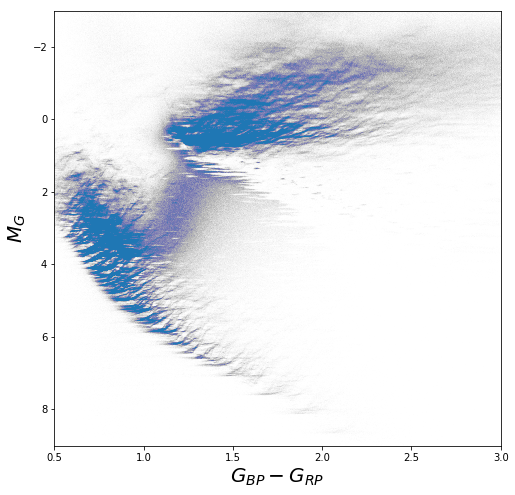

In [22]:
#############################################################################
# Bp-Rp vs AbsGmag over entire Marchetti subset

#Calculating Absolute Magnitude now with Extinction
Abs_gaiaGmag = Gaia_Gmag - 5*np.log10(Gaia_dist) + 5 - Extinction

#Plotting CMD
plt.figure(figsize=(8,8))
plt.scatter(Gaia_BPmag - Gaia_RPmag, Abs_gaiaGmag, s=0.0037, alpha=0.01)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,3)
plt.ylim(9,-3)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize=20)
plt.ylabel("$M_G$", fontsize=20)

# Selecting Stars around the Sun within a radius of 100pc for GAIA

In [23]:
#Creating cylindrical coordinate R
R2 = Gaia_X**2 + Gaia_Y**2

#Selecting stars around 100 pc of Sun
ichoose2 = np.where((R2 < 10000))

#Creating empty arrays and filling them with zeros.
G_Z_Close = np.zeros(len(ichoose2[0])-1)
G_Gmag_Close = np.zeros(len(ichoose2[0])-1)      
G_GBPmag_Close = np.zeros(len(ichoose2[0])-1)      
G_GRPmag_Close = np.zeros(len(ichoose2[0])-1)
G_Exct_Close = np.zeros(len(ichoose2[0])-1)
G_ColorE_Close = np.zeros(len(ichoose2[0])-1)
G_dist_Close = np.zeros(len(ichoose2[0])-1)

#Adding the selected stars to the arrays and 
#converting to Galactocentric coord and kpc.
for i in range(0,len(ichoose2[0])-1):
    G_Z_Close[i] = (Gaia_Z[ichoose2[0][i]] + 25)*0.001
    G_Gmag_Close[i] = Gaia_Gmag[ichoose2[0][i]]
    G_GBPmag_Close[i] = Gaia_BPmag[ichoose2[0][i]]
    G_GRPmag_Close[i] = Gaia_RPmag[ichoose2[0][i]]
    G_Exct_Close[i] = Extinction[ichoose2[0][i]]
    G_ColorE_Close[i] = Color_exc[ichoose2[0][i]]
    G_dist_Close[i] = Gaia_dist[ichoose2[0][i]]

# Plotting GAIA CMD for Close Stars

Text(0,0.5,'$M_G$')

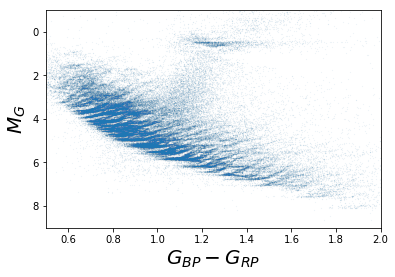

In [24]:
#############################################################
#Bp-Rp vs AbsGmag

#Making my X-axis
BPRP = G_GBPmag_Close - G_GRPmag_Close

#Calculating Absolute Magnitude with Extinction
G_Abs_Gmag_Close = G_Gmag_Close - 5*np.log10(G_dist_Close) + 5 - G_Exct_Close

# Plotting the image
plt.scatter(BPRP, G_Abs_Gmag_Close, s=0.02, alpha=0.2)
plt.ylim(reversed(plt.ylim()))
plt.xlim(0.5,2)
plt.ylim(9,-1)
plt.xlabel("$G_{BP}-G_{RP}$", fontsize=20)
plt.ylabel("$M_G$", fontsize=20)

# Same graph as above but colored based on distance from the Plane

C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dougl\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


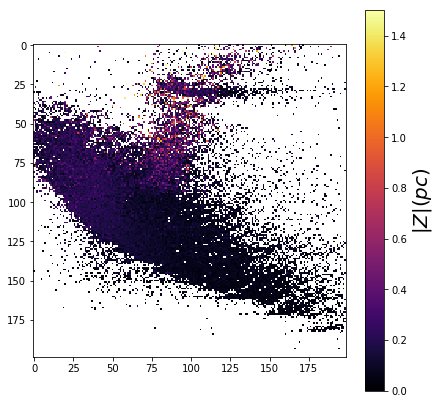

In [25]:
##############################################################################
# Creating bins and 2d Hist for xed and yed.
bin_x = np.arange(0.5,2, step=0.0075)
bin_y = np.arange(-1,9, step=0.05)
H, xed, yed = np.histogram2d(BPRP, G_Abs_Gmag_Close, bins=(bin_x,bin_y))

##############################################################################
# Creating empty 2-D array that will be color function
Z_Graph = np.ndarray(shape=(len(yed)-1,len(xed)-1))

##############################################################################
# Loop to index each point; calculate its mean Vphi and set it to array
for i in range(0, len(bin_x)-1):
    
    for j in range(0, len(bin_y)-1):
        
        ichoose = np.where( (BPRP>bin_x[i]) 
                           & (BPRP<bin_x[i+1]) 
                           & (G_Abs_Gmag_Close>bin_y[j]) 
                           & (G_Abs_Gmag_Close<bin_y[j+1]))
        
        ####################################################
        # np matrices do rows first and columns second. Thats why its [j,i]
        Z_Graph[j,i] = np.median(np.abs(G_Z_Close[ichoose]))

##############################################################################
# Plotting image and colorbar
plt.figure(figsize=(7,7))
E = plt.imshow(Z_Graph,cmap='inferno',origin='lower',vmin=0,vmax=1.5)
plt.ylim(reversed(plt.ylim()))
C = plt.colorbar(E)
C.set_label('$|Z|(pc)$',size=20)